# **The Original Problem**

- Stephen Welch
- UNCC Computer Vision

Recommended [Jupyter Theme](https://github.com/dunovank/jupyter-themes) for this notebook:
````
jt -t grade3 -cellw=90% -fs=20 -tfs=20 -ofs=20 -dfs=20
````

(Optional) Download data + videos if you don't have them.

In [1]:
import os, sys
sys.path.append('..')
from util.get_and_unpack import get_and_unpack

if not os.path.isdir('../data'):
    url = 'http://www.welchlabs.io/unccv/the_original_problem/data/data.zip'
    get_and_unpack(url, location='..')
    
if not os.path.isdir('../videos'):
    url = 'http://www.welchlabs.io/unccv/the_original_problem/videos.zip'
    get_and_unpack(url, location='..')   

![](graphics/spacer_small.png)

# **The Original Problem**

The thing we're going to learn about in this course, **computer vision**, has a very interesting history. It's roots really go all the way back to the beginning of computing and **artifical intelligence.** When this course is over, I want you to understand where we **really** are today, how we got here, and be able to make some reasonable conjectures about where the field is going next. 

I want you to be comfortable with cutting edge deep learning techniques, but also understand the broader context to which they belong. I want you to really understand why it's so deceptively difficult to program a computer to anything remotely close to what our visual cortex does. 

To acheive this, we need to go back to the beginning. Not the very beginning, but pretty close. We need to go back to MIT in the summer of 1966 and visit the **Artifical Intelligence Group.**

![](../graphics/original_mit_crew-01.png)

In the summer of 1966, Marvin Minsky and Seymour Papert, co-directors of the MIT AI Labratory, launched an ambitious summer project. 

![](../graphics/summer_project_abstract-01.png)

___

![](../graphics/summer_project_goals-01.png)

The goals of the summer project included localizing + classifying objects in images. **Easy, right?** A 2 year old can do this. In the spirit of the summer project, let's look at some data.

![](../videos/brick_ball_cylinder.gif)

# Can you write code to tell these apart?

- What about localizing these objects in the image?
- 50 years ago, some of the smartest folks in AI thought they could do this in a summer - **let's try it today.**
- Your job in this module is to create your own solution to the MIT Summer Vision Project.
- Over the next week or so, we'll discuss 3 big ideas in computer vision: 
    - Edges
    - Corners
    - Hough Transform
- We have a huge advantage over the MIT team becuase we have way better tools. We'll limit ourselves a little to **python and numpy**. (no opencv, sklearn, tensorflow, that will all come later). 

[Animation of the three tools we'll learn]

[Graphic showing progression of the software tools we'll use in the course]

## Let's get to know our data a little

In [2]:
#ipython magic numpy and matplotlib import function
%pylab inline 
import glob

Populating the interactive namespace from numpy and matplotlib


## Easy Images

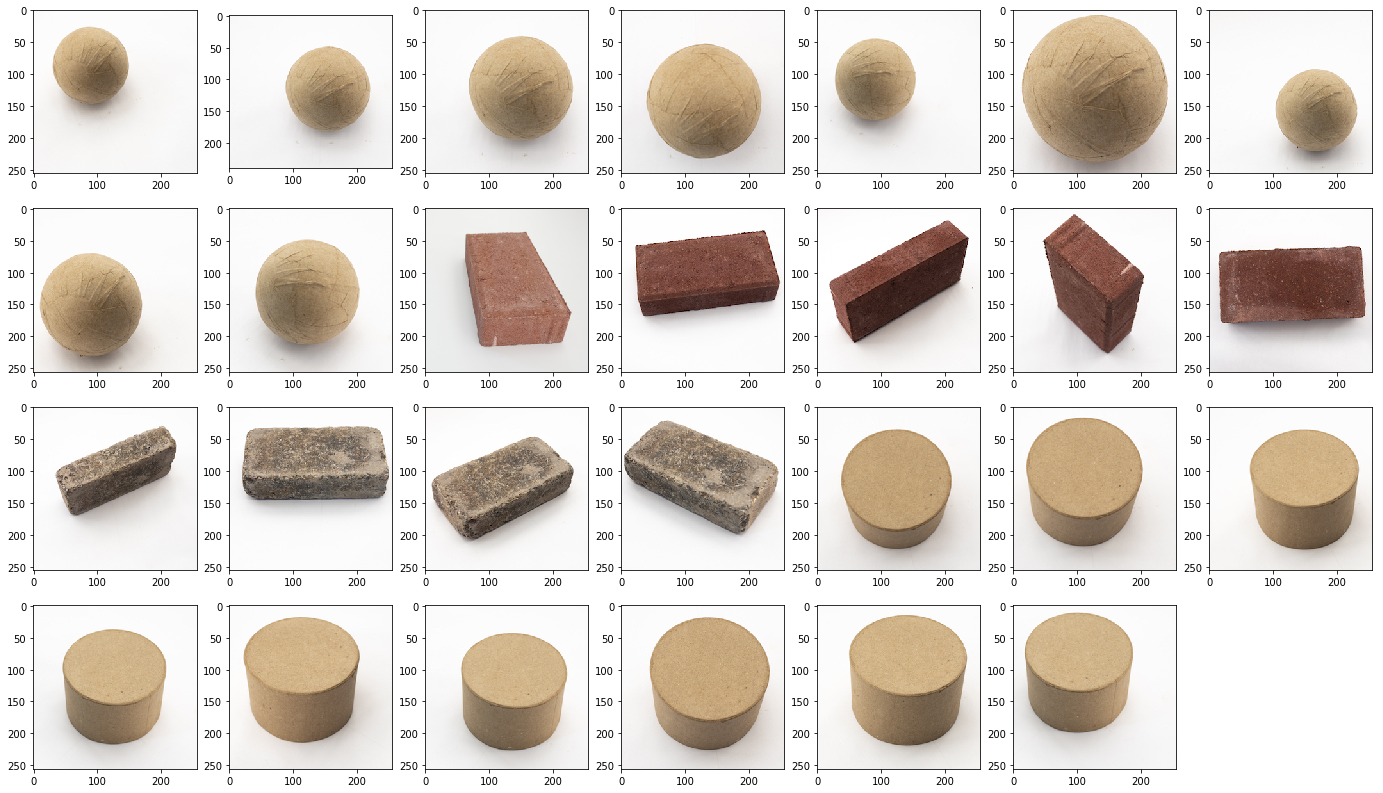

In [3]:
data_dir = '../data/'
easy_images = glob.glob(data_dir + 'easy/*/*')

fig = figure(0, (24,14))
num_cols = 7
num_rows = int(ceil(len(easy_images)/num_cols))
for i, easy_image in enumerate(easy_images):
    im = imread(easy_image)
    fig.add_subplot(num_rows, num_cols, i+1)
    imshow(im)

- Just as in the MIT summer project, these easy images have homogeneous backgrounds.
- They also have good lighting.
- Easy, right? What could go wrong? :)

## Medium Images

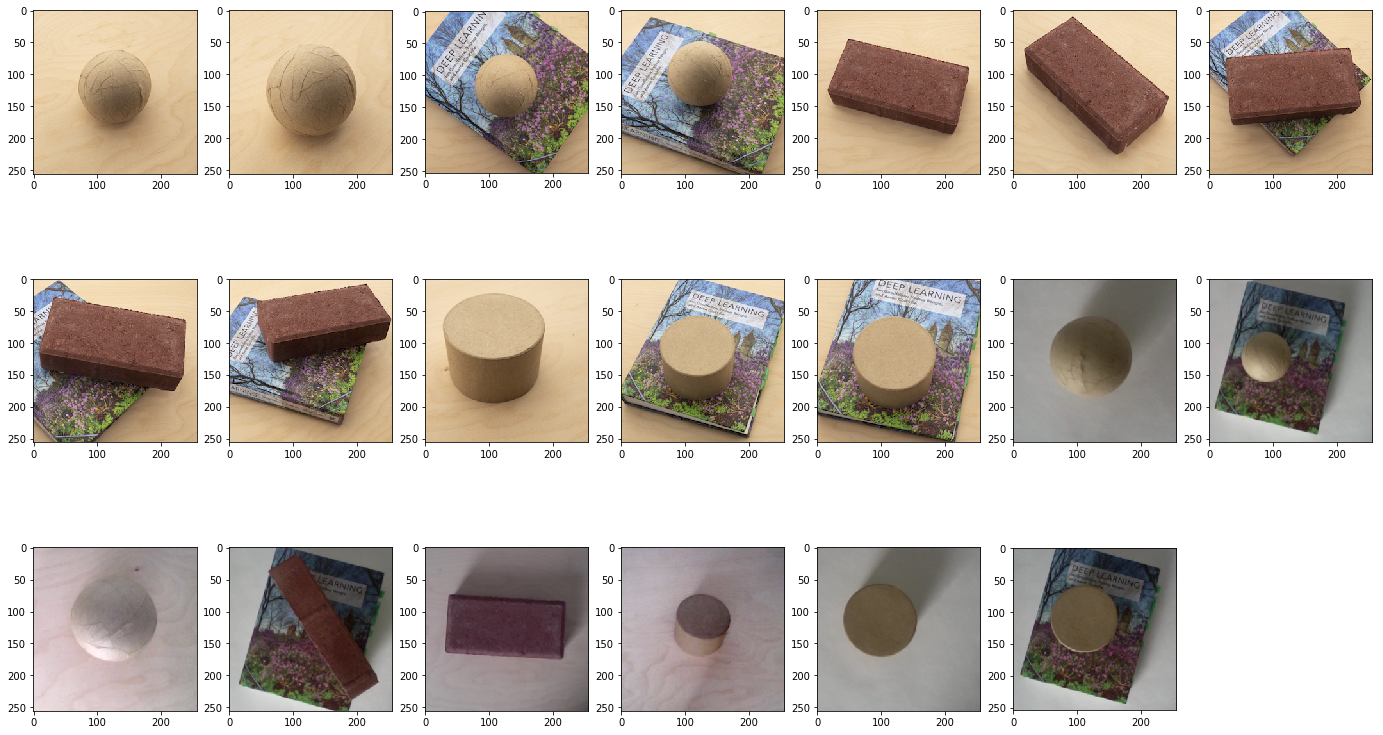

In [4]:
data_dir = '../data/'
medium_images = glob.glob(data_dir + 'medium_1/*/*')
medium_images.extend(glob.glob(data_dir + 'medium_2/*/*'))

fig = figure(0, (24,14))
num_cols = 7
num_rows = int(ceil(len(medium_images)/num_cols))
for i, image in enumerate(medium_images):
    im = imread(image)
    fig.add_subplot(num_rows, num_cols, i+1)
    imshow(im)

- **Medium difficulty** images have a more complex background (wood), 1 extraneous object sometimes, poor lighting sometimes, and are taken with a lower quality camera sometimes.

## Hard Images

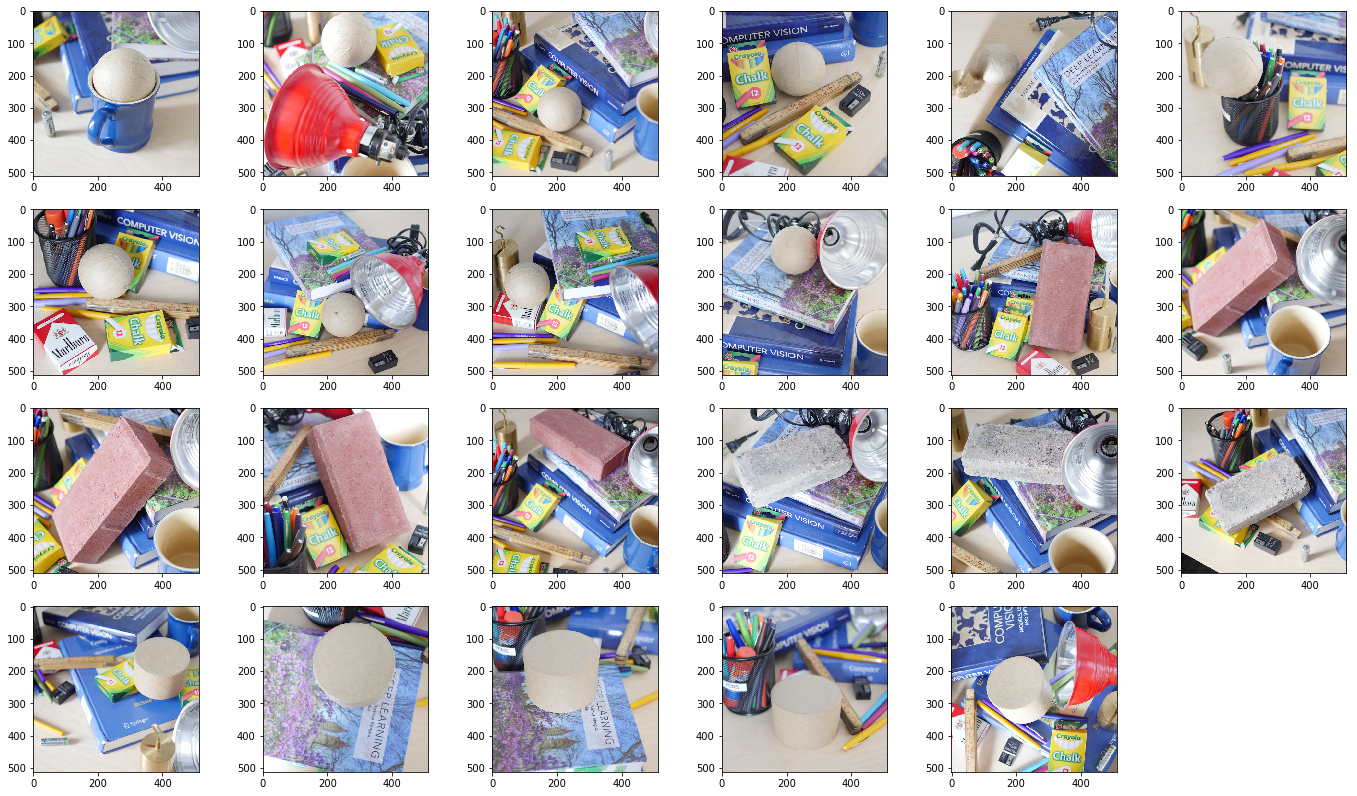

In [5]:
data_dir = '../data/'
images = glob.glob(data_dir + 'hard/*/*')

fig = figure(0, (24,14))
num_cols = 6
num_rows = int(ceil(len(images)/num_cols))
for i, image in enumerate(images):
    im = imread(image)
    fig.add_subplot(num_rows, num_cols, i+1)
    imshow(im)

These images are designed to correspond to the August goal for the MIT summer project. Complex, cluttered backgrounds.

## **The Challenge**

- Write a method `classify.py` that takes in an image and returns a prediction. 
- An example script in located in challenge/sample_student.py
- Your script will be automatically evaluated on a set of test images. 
- The testing images are quite similar to the training images, and organized into the same difficulty categories. 
- You are allowed 10 submissions to the evaluation server, which will provide immediate feedback.

## **Grading**

For each difficulty level, we will compute the average accuracy of your classifier. We will then compute an average overall accuracy, weighting easier examples more: 

$$
acc_{overall} = 0.5 \cdot acc_{easy} + 0.2 \cdot acc_{medium_1} + 0.2 \cdot acc_{medium_2} + 0.1 \cdot acc_{hard}
$$



For example, if you just guess randomly, you should on average have a 33% accuracy. Your overall accuracy would be:

In [6]:
accuracy_easy = 0.33
accuracy_medium_1 = 0.33
accuracy_medium_2 = 0.33
accuracy_hard = 0.33

overall_accuracy = 0.5*accuracy_easy \
                 + 0.2*accuracy_medium_1 \
                 + 0.2*accuracy_medium_2 \
                 + 0.1*accuracy_hard 
            
print(overall_accuracy)

0.33000000000000007


## **Grading Rubric**

| Overall Accuracy | Points |
| ------------- |:-------------:| 
| >= 0.6         | 10/10 | 
| 0.55 <= a < 0.6  | 9/10|  
| 0.5 <= a < 0.55 | 8/10 |   
| 0.45 <= a < 0.5 | 7/10 | 
| 0.40 <= a < 0.45 | 6/10 | 
| 0.35 <= a < 0.40 | 5/10 | 
| a < 0.35 | 4/10 |
| Non-running code | 0/10|


- Finally, we will keep a leaderboard and the top accuracy submission will receive...

![](../graphics/starbucks_giftcard.jpg)

- Get hype.

# **[Quick Grading Server Demo]**